In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
np.random.seed(1024)

In [3]:
n_samples=200

In [4]:
x=np.random.rand(n_samples,1)-0.59;

In [5]:
x_flatten=x[:,0]

In [6]:
noise = 0.01 * np.random.randint(1, 5, size=n_samples)
y = x_flatten**3 + noise

In [7]:
df=pd.DataFrame()

In [8]:
df['X'] = x_flatten.reshape(200)
df['Y'] = y
     

In [9]:
df

,X,Y
0,0.057691,0.040192
1,0.406914,0.087376
2,-0.071197,0.009639
3,0.068113,0.030316
4,0.009063,0.040001
...,...,...
195,0.192362,0.047118
196,0.389313,0.099006
197,-0.423399,-0.055901
198,0.296365,0.066030


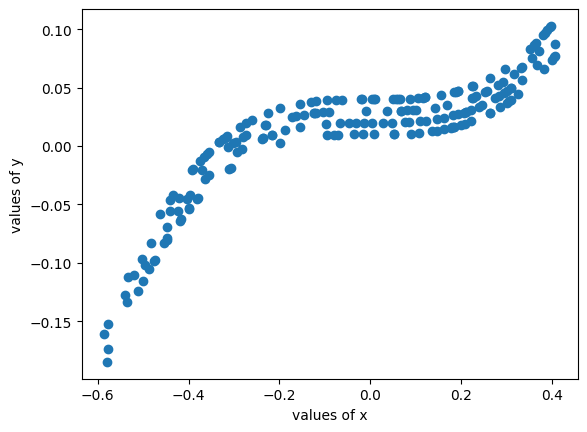

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['Y'])
plt.xlabel("values of x")
plt.ylabel("values of y")
plt.show()

In [11]:
df['pred1']=df['Y'].mean()

In [12]:
df

,X,Y,pred1
0,0.057691,0.040192,0.010454
1,0.406914,0.087376,0.010454
2,-0.071197,0.009639,0.010454
3,0.068113,0.030316,0.010454
4,0.009063,0.040001,0.010454
...,...,...,...
195,0.192362,0.047118,0.010454
196,0.389313,0.099006,0.010454
197,-0.423399,-0.055901,0.010454
198,0.296365,0.066030,0.010454


In [13]:
df['pseudo one']=df['Y']-df['pred1']

In [14]:
df

,X,Y,pred1,pseudo one
0,0.057691,0.040192,0.010454,0.029738
1,0.406914,0.087376,0.010454,0.076922
2,-0.071197,0.009639,0.010454,-0.000815
3,0.068113,0.030316,0.010454,0.019862
4,0.009063,0.040001,0.010454,0.029547
...,...,...,...,...
195,0.192362,0.047118,0.010454,0.036664
196,0.389313,0.099006,0.010454,0.088552
197,-0.423399,-0.055901,0.010454,-0.066355
198,0.296365,0.066030,0.010454,0.055576


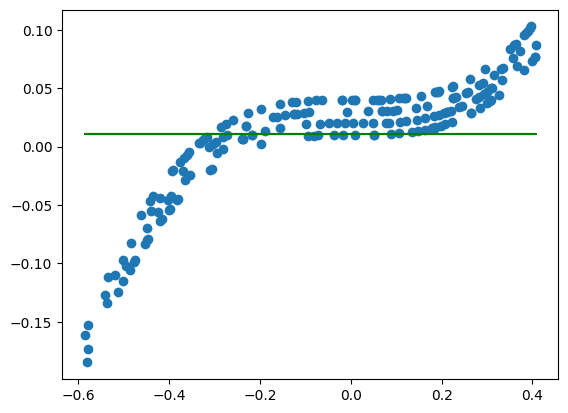

In [15]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['pred1'],color='green')

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [18]:
tree1.fit(df['X'].values.reshape(200,1),df['pseudo one'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [19]:
from sklearn.tree import plot_tree

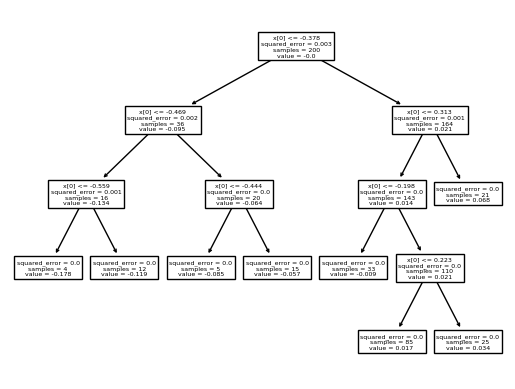

In [20]:
plot_tree(tree1)
plt.show()

In [30]:
x_test=np.linspace(-0.5,0.5,200)

In [37]:
Y_pred_model2=0.010454+0.09*tree1.predict(x_test.reshape(-1,1))

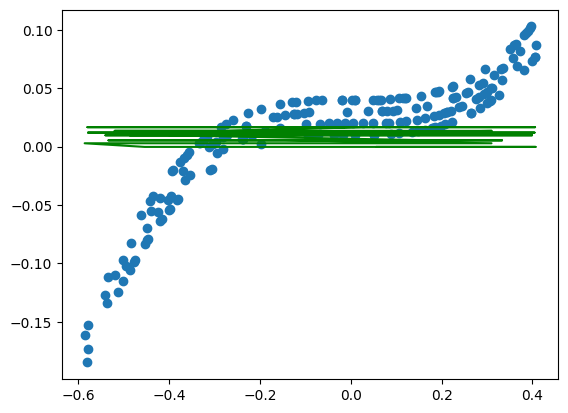

In [38]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],Y_pred_model2.reshape(200,1),color='green')

In [39]:
df['pred2'] = 0.010454 + tree1.predict(df['X'].values.reshape(200,1))

In [41]:
df

,X,Y,pred1,pseudo one,pred2
0,0.057691,0.040192,0.010454,0.029738,0.027258
1,0.406914,0.087376,0.010454,0.076922,0.078906
2,-0.071197,0.009639,0.010454,-0.000815,0.027258
3,0.068113,0.030316,0.010454,0.019862,0.027258
4,0.009063,0.040001,0.010454,0.029547,0.027258
...,...,...,...,...,...
195,0.192362,0.047118,0.010454,0.036664,0.027258
196,0.389313,0.099006,0.010454,0.088552,0.078906
197,-0.423399,-0.055901,0.010454,-0.066355,-0.046394
198,0.296365,0.066030,0.010454,0.055576,0.044071


In [42]:
df['res2'] = df['Y'] - df['pred2']

In [43]:
df

,X,Y,pred1,pseudo one,pred2,res2
0,0.057691,0.040192,0.010454,0.029738,0.027258,0.012934
1,0.406914,0.087376,0.010454,0.076922,0.078906,0.008470
2,-0.071197,0.009639,0.010454,-0.000815,0.027258,-0.017619
3,0.068113,0.030316,0.010454,0.019862,0.027258,0.003058
4,0.009063,0.040001,0.010454,0.029547,0.027258,0.012742
...,...,...,...,...,...,...
195,0.192362,0.047118,0.010454,0.036664,0.027258,0.019860
196,0.389313,0.099006,0.010454,0.088552,0.078906,0.020100
197,-0.423399,-0.055901,0.010454,-0.066355,-0.046394,-0.009508
198,0.296365,0.066030,0.010454,0.055576,0.044071,0.021959


In [44]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [46]:
tree2.fit(df['X'].values.reshape(200,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [60]:
y_pred = 0.265458 + 5*sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

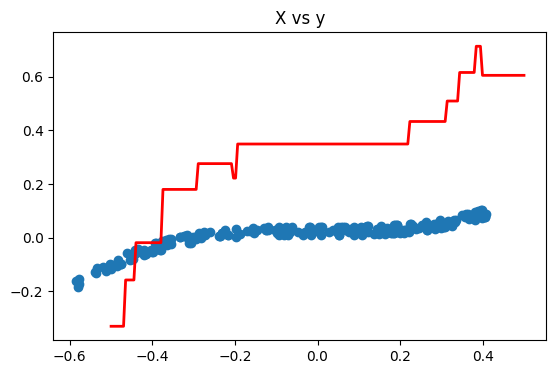

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['Y'])
plt.title('X vs y')

In [63]:
# dont go on accuracy i just tackled how gradient boost works
# and i get it